In [1]:
from run_detection import *

In [2]:
# mod_p = r'.\detr_noneg_100q_bs20_r50dc5'
mod_p = r'C:\Users\laeri\NBM\BirdSoundClassif\models_detr\detr_dsv2_100q_bs20_r101dc5_nn'
model, config = load_model(mod_p)

In [3]:
### Load bird id dictionary

# Bird dict
dict_dir = r'.'
with open(os.path.join(dict_dir, 'bird_dict.json'), 'r') as f:
    birds_dict = json.load(f)

birds_dict.update({'Non bird sound': 0})
reverse_dict = {id: bird_name for bird_name, id in birds_dict.items()}

### Eval model

In [ ]:
test_dirp = r'C:\Users\laeri\NBM\data_2\test_set_audio\XC_annots'
for i, wav_f_p in enumerate(glob.glob(test_dirp + '/*.wav')):
    #### Exec model
    fp, outputs, spectrogram = run_detection(model, config, wav_f_p, return_spectrogram=True)
    ### Visualisation des résultats
    class_bbox = merge_images(fp, outputs, config.num_classes)
    output = {reverse_dict[idx]: {key: value.cpu().numpy().tolist() for key, value in class_bbox[str(idx)].items()} for idx in range(1, len(class_bbox) + 1) if len(class_bbox[str(idx)]['bbox_coord']) > 0}
    visualise_model_out(output, fp, spectrogram, reverse_dict)
    #if i > 30:
    #    break

In [2]:
test_dirp = r'C:\Users\laeri\NBM\data_2\test_set_audio\XC_annots'
for i, wav_f_p in enumerate(glob.glob(test_dirp + '/*.wav')):
    break

In [5]:
# fp, outputs, spectrogram = run_detection(model, config, wav_f_p, return_spectrogram=True)

In [3]:
min_score=0.5
bs=10

In [4]:
    fp = File_Processor(wav_f_p)
    img_db, _ = fp.process_file()
    
    batch = []
    outputs = []
    spectrogram = []

    n_img = len(img_db)
    b_idx = 0
    for i in tqdm(range(n_img)):
        img = img_db[i]
        batch.append(img)
        if (len(batch) == bs) or (i == n_img - 1):
            batch = torch.Tensor(np.stack(batch)).to(device)
            break

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00, 25.85it/s]


In [7]:
mod_p = r'C:\Users\laeri\NBM\BirdSoundClassif\models_detr\detr_dsv2_100q_bs20_r101dc5_nn'
args_path = os.path.join(mod_p, 'args')
with open(args_path, 'rb') as f:
    args = json.load(f)

config = Config()
for attr, attr_value in args.items():
    setattr(config, attr, attr_value)

backbone = build_backbone(config)
transformer = build_transformer(config)

model = DETR(
    backbone,
    transformer,
    num_classes=config.num_classes,
    num_queries=config.num_queries,
    aux_loss=False,
    deformable=True
)

In [8]:
self = model.cuda()

In [9]:
batch.shape

torch.Size([5, 375, 1024])

In [10]:
with torch.no_grad():
    samples = self.init_conv(batch[:, None])
    # if isinstance(samples, (list, torch.Tensor)):
    #     samples = nested_tensor_from_tensor_list(samples)
    features, pos = self.backbone(samples)
    
    # src, mask = features[-1].decompose()
    src = features[-1]

In [11]:
self.backbone.strides

[8, 16, 8]

In [12]:
with torch.no_grad():
    srcs = []
    for l, src in enumerate(features):
        srcs.append(self.input_proj[l](src))
    last_conv_out = self.input_proj[-1](src)
    srcs.append(last_conv_out)
    pos.append(self.backbone[1](last_conv_out).to(last_conv_out.dtype))

In [13]:
[e.shape for e in srcs]

[torch.Size([5, 256, 47, 128]),
 torch.Size([5, 256, 24, 64]),
 torch.Size([5, 256, 24, 64]),
 torch.Size([5, 256, 12, 32])]

### Demo file

In [6]:
##
test_dirp = r'C:\Users\laeri\NBM\BirdSoundClassif\tests\audio_samples'
# test_dirp = r'test/audio_samples/'
##

In [7]:
wav_f_p = glob.glob(test_dirp + '/*.wav')
t_filep = wav_f_p[0]

In [8]:
#### Exec model
fp, outputs, spectrogram = run_detection(model, config, t_filep, return_spectrogram=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.54s/it]


0


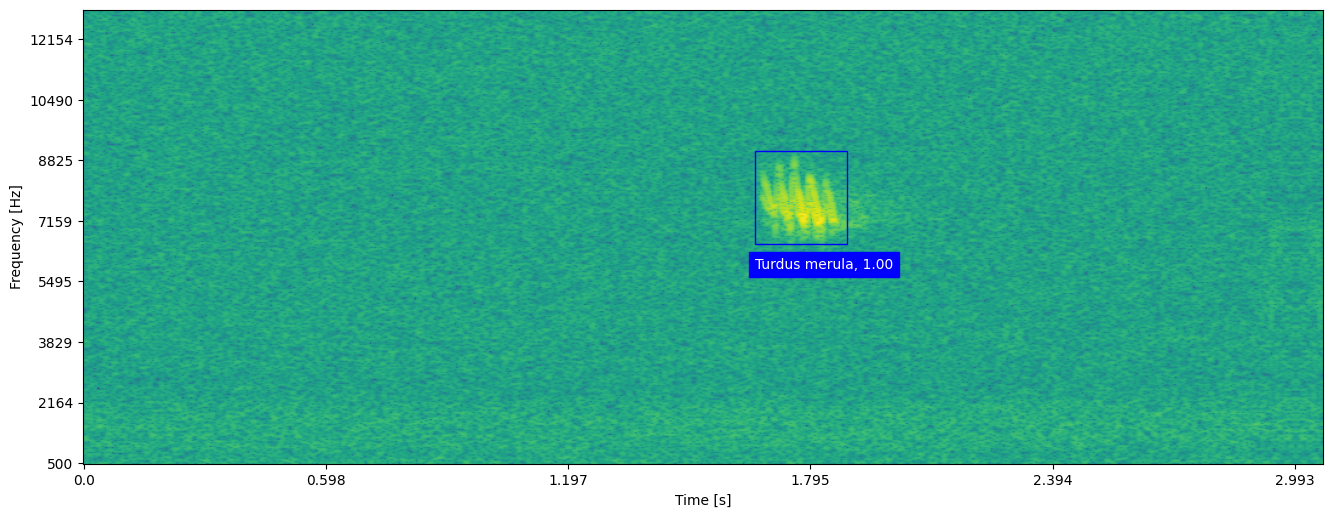

In [9]:
### Visualisation des résultats
class_bbox = merge_images(fp, outputs, config.num_classes)
output = {reverse_dict[idx]: {key: value.cpu().numpy().tolist() for key, value in class_bbox[str(idx)].items()} for idx in range(1, len(class_bbox) + 1) if len(class_bbox[str(idx)]['bbox_coord']) > 0}
visualise_model_out(output, fp, spectrogram, reverse_dict)

0


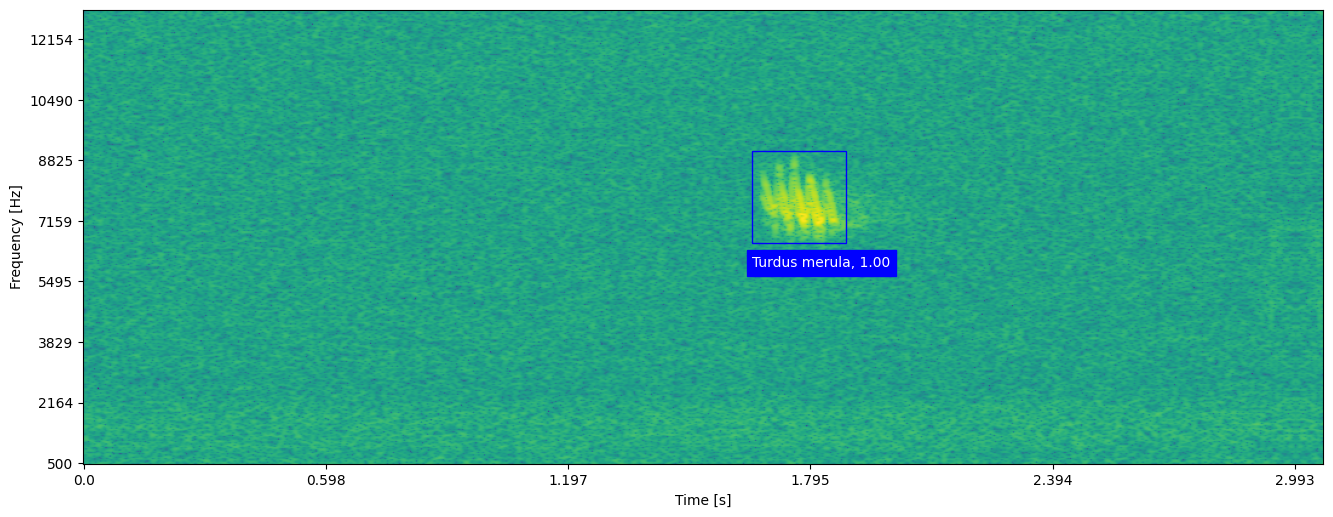

In [13]:
### Visualisation des résultats
class_bbox = merge_images(fp, outputs, config.num_classes)
output = {reverse_dict[idx]: {key: value.cpu().numpy().tolist() for key, value in class_bbox[str(idx)].items()} for idx in range(1, len(class_bbox) + 1) if len(class_bbox[str(idx)]['bbox_coord']) > 0}
visualise_model_out(output, fp, spectrogram, reverse_dict)

In [11]:
output

{}

In [10]:
birds_dict

{'Grus grus': 1,
 'Haematopus ostralegus': 2,
 'Anthus trivialis': 3,
 'Turdus iliacus': 4,
 'Turdus philomelos': 5,
 'Strix aluco': 6,
 'Motacilla flava': 7,
 'Vanellus vanellus': 8,
 'Ficedula hypoleuca': 9,
 'Erithacus rubecula': 10,
 'Emberiza hortulana': 11,
 'Gallinula chloropus': 12,
 'Alauda arvensis': 14,
 'Actitis hypoleucos': 15,
 'Muscicapa striata': 16,
 'Anas platyrhynchos': 17,
 'Burhinus oedicnemus': 18,
 'Fulica atra': 19,
 'Turdus merula': 20,
 'Branta bernicla': 21,
 'Pluvialis apricaria': 22,
 'Branta canadensis': 23,
 'Athene noctua': 24,
 'Tachybaptus ruficollis': 25,
 'Chroicocephalus ridibundus': 26,
 'Ardea cinerea': 27,
 'Corvus corone': 28,
 'Charadrius hiaticula': 29,
 'Numenius phaeopus': 30,
 'Charadrius morinellus': 31,
 'Calidris alpina': 32,
 'Coturnix coturnix': 34,
 'Tyto alba': 35,
 'Anthus pratensis': 36,
 'Otus scops': 37,
 'Tringa ochropus': 38,
 'Phasianus colchicus': 39,
 'Tringa totanus': 40,
 'Tringa nebularia': 41,
 'Fringilla coelebs': 42,
 